# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [42]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

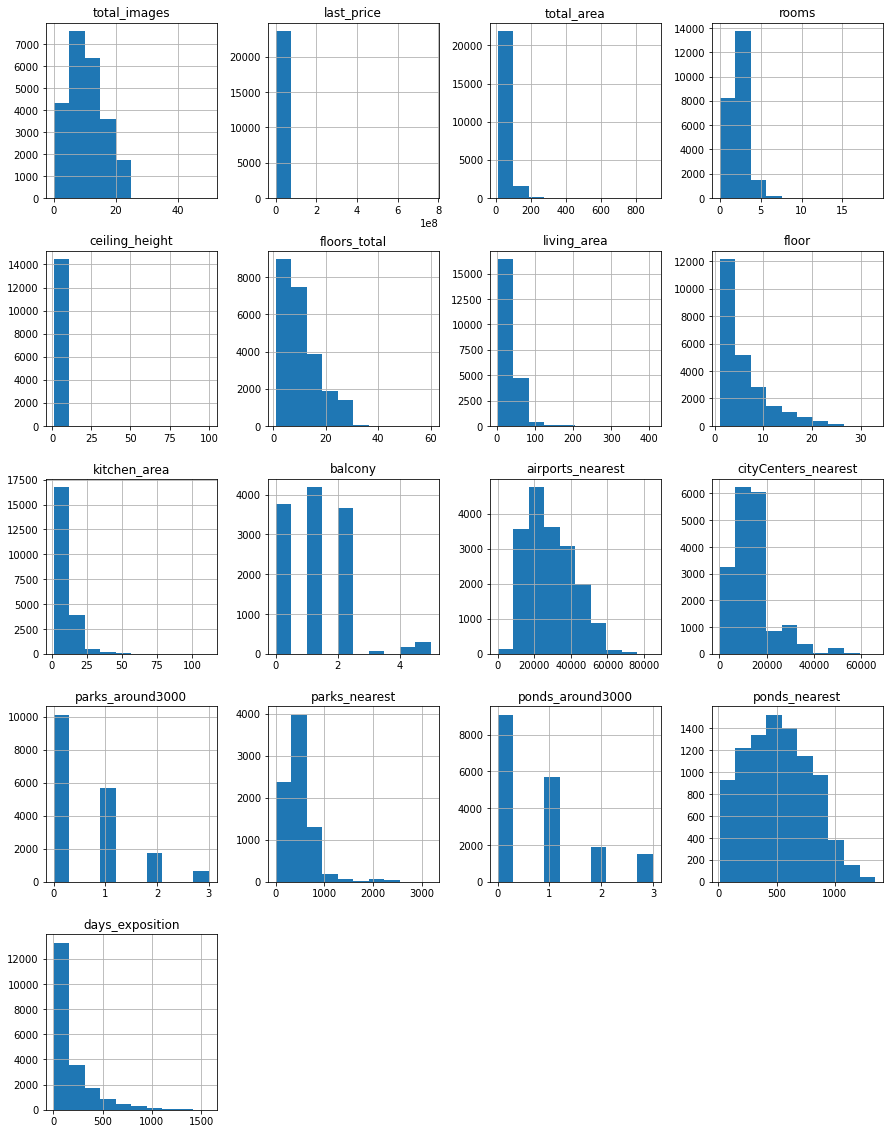

In [3]:
data.hist(figsize=(15, 20))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Короткий вывод о проблемах с данными:**
- Изучила общую информацию о полученном датафрейме. Предстоит интересная работа - вижу пропуски, неверные типы данных, аномальные значения. План по пропускам-заменить только те значения, где это логично и не повлияет на разультат исследования. В столбце "Дата публикации", "Название населенного пункта", "Всего этажей в доме" и "Количество балконов" заменим тип данных. Избавимся от дубликатов и аномальных значений. Вперед!

### Предобработка данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Итак, мой план по пропускам:**
- ceiling_height           9195 много. Высота потолков, заполню пропуски в этом столбце медианным значением ceiling_height
- floors_total               86 мало. Всего этажей. На результат особо не повлияет, удаляем
- living_area              1903 много. Жилая площадь, предлагаю поправить на среднее значение 
- is_apartment            20924 очень много. Под вопросом. Предлагаю заменить nan на False
- kitchen_area             2278 площадь кухни. Может, это студия, и там нет кухни?
- balcony                 11519 пропуск означает отсутствие балкона? Заменю на 0
- locality_name              49 мало. Название нп. На результат особо не повлияет, удаляем
- airports_nearest         5542 пропуск не понятен. Заменять средним значением по соотв-му НП считаю не корректным
- cityCenters_nearest      5519 расстояние до центра города. Пропуск не понятен
- parks_around3000         5518 число парков в радиусе 3 км. Пропуск не понятен
- parks_nearest           15620 расстояние до ближайшего парка. Пропуск не понятен
- ponds_around3000         5518 число водоёмов в радиусе 3 км. Пропуск не понятен 
- ponds_nearest           14589 расстояние до ближайшего водоёма (м). Пропуск не понятен
- days_exposition          3181 сколько дней было размещено объявление (от публикации до снятия). Может, объявление еще актуально?

In [6]:
#ceiling_height
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

#floors_total 
data.dropna(subset=['floors_total'], inplace=True)

#living_area 
living = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living * data['total_area'], inplace=True)

#is_apartment
data['is_apartment'].fillna(False, inplace=True)

#kitchen_area
kitchen = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen * data['total_area'], inplace=True)

#balcony
data['balcony'].fillna(0, inplace=True)

#locality_name
data.dropna(subset=['locality_name'], inplace=True)

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Причины, которые могли привести к пропускам в данных:**

- Пропуски в balcony скорее всего означают отсутствие балкона, поэтому я заменила их на нули.
- Пропуски в days_exposition возможно связаны с тем, что объявление еще не снято с публикации и является актуальным.
- Пропуски в ceiling_height не понятны. Я заменила пропуски в этих данных медианными значениями, на мой взгляд, в вышеуказанных столбцах это сделать логично, амплитуда значений не такая большая, как, например, airports_nearest или cityCenters_nearest.  
- Пропуски в living_area, kitchen_area заменила на средний процент жилой площади/кухни от всей площади по всей выборке.
- Пропуски в floors_total, locality_name встречаются редко, ввиду их незначительности и малого веса на результат-удалила.
- Пропуски в is_apartment я заменила на False. Скорее всего, 20924 квартир не являются апартаментами. Пропуск может быть связан с тем, что собственник не посчитал нужным заполнить данный раздел, +апартаменты относительно новое понятие, может, данные устарели.
- Пропуски в airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest оставим как есть, происхождение не понятно-может, произошел технический сбой? Замена на 0 или медианные значения такого количества данных может повлиять на результат исследования.

In [7]:
#Изменим типы данных:

from datetime import datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

data['floors_total']=data['floors_total'].astype('int')

data['balcony']=data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Почему нужно изменить тип данных:**
- Я изменила типы данных в столбце "Дата публикации" на формат даты, "Название населенного пункта"-на строки, т.к. при следующих расчетах это упростит мне работу, "Всего этажей в доме" и "Количество балконов" на целые числа, т.к. это логично- данные измеряются в единицах.


In [8]:
#дубликаты
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'поселок')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское

In [9]:
#потолки
data[data['ceiling_height'] > 5].sort_values('ceiling_height').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5,33.0,4,False,...,9.804185,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.000000,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4,22.0,2,False,...,10.000000,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,4.376868,2,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,8.600000,2,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,9.000000,1,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.000000,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.000000,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.500000,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.000000,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


<AxesSubplot:>

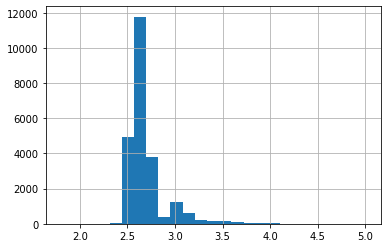

In [10]:
#получила выборку высоких потолков. Потолки высотой 22-32 м заменю на 2.5-3.2 м
data.loc[data['ceiling_height'] == 25.0, 'ceiling_height'] = 2.5
data.loc[data['ceiling_height'] == 26.0, 'ceiling_height'] = 2.6
data.loc[data['ceiling_height'] == 27.0, 'ceiling_height'] = 2.7
data.loc[data['ceiling_height'] == 32.0, 'ceiling_height'] = 3.2
data.loc[data['ceiling_height'] == 24.0, 'ceiling_height'] = 2.4
data.loc[data['ceiling_height'] == 22.6, 'ceiling_height'] = 2.3
data.loc[data['ceiling_height'] == 27.5, 'ceiling_height'] = 2.8
data = data[data['ceiling_height'] <= 4.5] # отбросим значения высоты потолков более 4.5 м
data = data[data['ceiling_height'] > 2] # отбросим значения высоты потолков менее 2 м
data['ceiling_height'].describe()
data['ceiling_height'].hist(bins=25, range = (1.8,5))

count    2.321200e+04
mean     5.729146e+06
std      4.008590e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      2.999900e+07
Name: last_price, dtype: float64

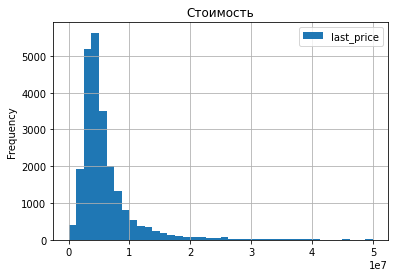

In [11]:
#по стоимости
data.plot(y = 'last_price', kind = 'hist', bins = 40, grid=True, title='Стоимость', range = (0,50000000))
data = data[data['last_price'] != 12190.0]
data = data[data['last_price'] < 30000000] # оставим квартиры до 30 млн руб
data['last_price'].describe()

count    23157.000000
mean         2.028285
std          0.979459
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

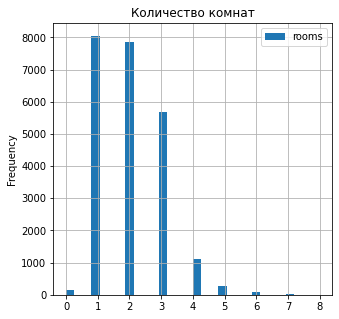

In [12]:
#по количечству комнат
data.query('rooms == 0')
data.query('total_area > 100 and studio==False') # у студий нет комнат. В выборке не без квартиры в ноль комнат с площадью 371 м. Удалим  
data = data[data['total_area'] != 371.0]
data.loc[(data['rooms'] == 0) & (data['studio']==False), 'rooms'] = 1 # заменим у маленьких квартир не-студий кол-во комнат 0 на 1
data.query('rooms == 0 and studio==False')
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, title='Количество комнат', range = (0,8), figsize = (5,5))
data = data[data['rooms'] < 7] # остановимся на 7 комнатах
data['rooms'].describe()

count    23095.000000
mean        57.332192
std         25.031743
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

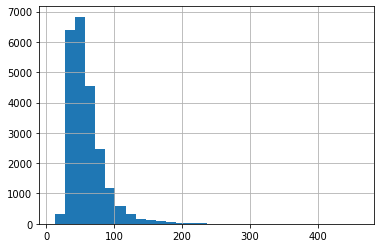

In [13]:
#общая площадь
data['total_area'].hist(bins=30)
data = data[data['total_area'] < 200] # оставим квартиры менее 200 кв. м
data['total_area'].describe()

In [14]:
data.shape[0] # 23095 после обработки и 23699 до. 2.5%

23095

**Какие особенности в данных я обнаружила:**
- Я сделала выборку потолков высотой более 5 м, в список попали такие значения, как 25 м. Логично предположить, что на самом деле это 2.5 м, подобные аномалии в таблице поправлены. Исключены данные по квартирам, где высота потолков более 4.5 м. Найдена квартира стоимостью 12190 руб., считаю это аномальным значением, данные по этой квартире убраны из исследования. Отсутствие комнат в квартирах не-студиях - отклонение, хотя бы 1 комната должна быть, заменила на 1. Установила предел для стоимости на квартиры в 30 млн руб, площадь - 200 кв.м и количество комнат - 7, ввиду малого количества объектов с такими показателями. По остальным столбцам весомых отклонений от нормы не обнаружено.

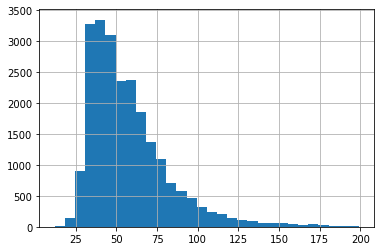

In [15]:
#код ревьюера
data['total_area'].hist(bins=30);

### Посчитайте и добавьте в таблицу новые столбцы

In [16]:
#цена одного квадратного метра
data['price_square_meter'] = data['last_price'] / data['total_area']
#день недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month
#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year
#тип этажа квартиры
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)    
#расстояние до центра города в км
data['cityCenters_nearest_km']=(data['cityCenters_nearest']/1000).round()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23095 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23095 non-null  int64         
 1   last_price              23095 non-null  float64       
 2   total_area              23095 non-null  float64       
 3   first_day_exposition    23095 non-null  datetime64[ns]
 4   rooms                   23095 non-null  int64         
 5   ceiling_height          23095 non-null  float64       
 6   floors_total            23095 non-null  int64         
 7   living_area             23095 non-null  float64       
 8   floor                   23095 non-null  int64         
 9   is_apartment            23095 non-null  bool          
 10  studio                  23095 non-null  bool          
 11  open_plan               23095 non-null  bool          
 12  kitchen_area            23095 non-null  float6

### Проведите исследовательский анализ данных

count    23095.000000
mean        57.332192
std         25.031743
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        199.200000
Name: total_area, dtype: float64

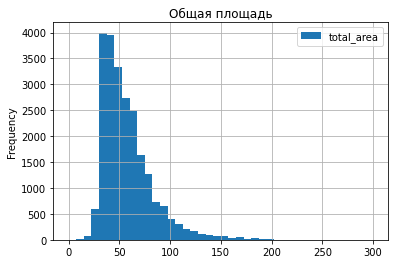

In [17]:
data.plot(y = 'total_area', kind = 'hist', bins = 40, grid=True, title='Общая площадь', range = (0,300))
data['total_area'].describe()

count    23095.000000
mean        32.853709
std         16.537229
min          2.000000
25%         18.900000
50%         30.000000
75%         41.600000
max        164.700000
Name: living_area, dtype: float64

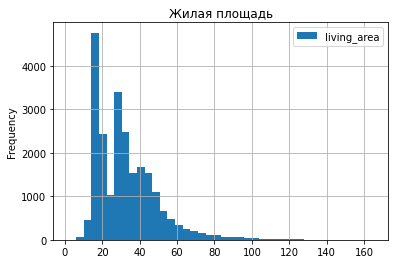

In [18]:
data.plot(y = 'living_area', kind = 'hist', bins = 40, title='Жилая площадь', grid=True)
data['living_area'].describe()

count    23095.000000
mean        10.151755
std          4.977179
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         65.000000
Name: kitchen_area, dtype: float64

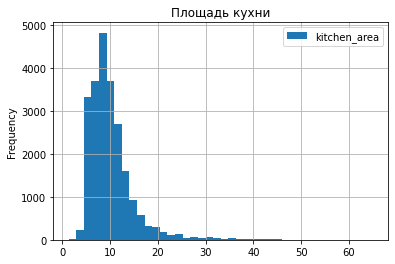

In [19]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 40, title='Площадь кухни', grid=True)
data['kitchen_area'].describe()

count    2.309500e+04
mean     5.654024e+06
std      3.858748e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.598500e+06
max      2.999900e+07
Name: last_price, dtype: float64

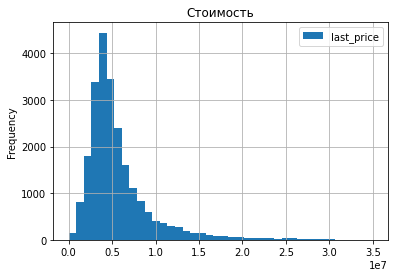

In [20]:
data.plot(y = 'last_price', kind = 'hist', bins = 40, grid=True, title='Стоимость', range = (0,35000000))
data['last_price'].describe()

1    8044
2    7866
3    5668
4    1083
5     243
0     134
6      57
Name: rooms, dtype: int64

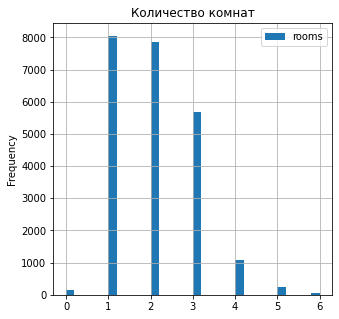

In [21]:
data['rooms']=data['rooms'].astype('int')
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, title='Количество комнат', figsize = (5,5))
data['rooms'].value_counts()

count    23095.000000
mean         2.689393
std          0.201782
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64

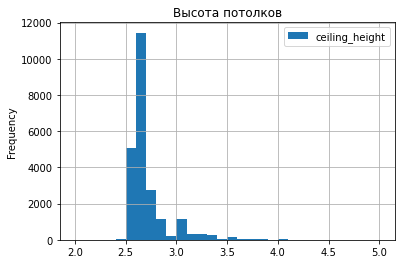

In [22]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, title='Высота потолков', range = (2,5))
data['ceiling_height'].describe()

count    23095.000000
mean         5.893613
std          4.890662
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

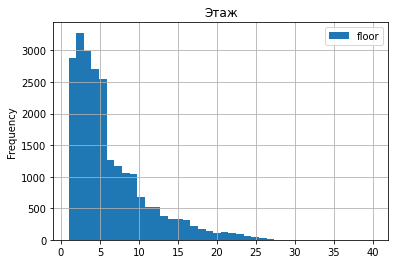

In [23]:
data.plot(y = 'floor', kind = 'hist', bins = 40, grid=True, title='Этаж', range = (1,40))
data['floor'].describe()

floor_category
другой       16997
первый        2878
последний     3220
Name: floor, dtype: int64


<AxesSubplot:xlabel='floor_category'>

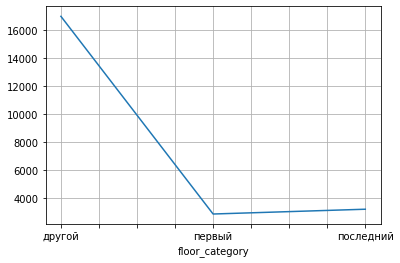

In [24]:
category = data.groupby('floor_category')['floor'].count()
print(category)
category.plot(grid=True)

count    23095.000000
mean        10.739381
std          6.617251
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

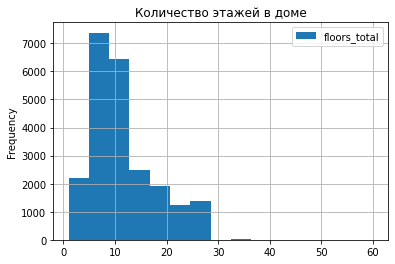

In [25]:
data.plot(y = 'floors_total', kind = 'hist', bins = 15, title='Количество этажей в доме', grid=True)
data['floors_total'].describe()

count    17616.000000
mean     14391.418710
std       8586.280987
min        208.000000
25%       9631.750000
50%      13222.000000
75%      16383.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

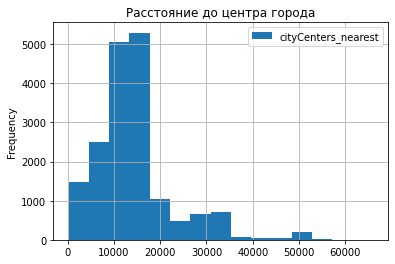

In [26]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 15, title='Расстояние до центра города', grid=True)
data['cityCenters_nearest'].describe()

count    17596.000000
mean     28852.017902
std      12743.292139
min          0.000000
25%      18446.000000
50%      26880.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

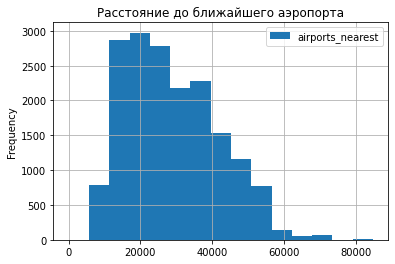

In [27]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 15, title='Расстояние до ближайшего аэропорта', grid=True)
data['airports_nearest'].describe()

count    7704.000000
mean      493.756750
std       342.563985
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

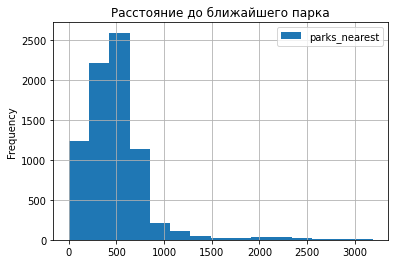

In [28]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 15, title='Расстояние до ближайшего парка', grid=True)
data['parks_nearest'].describe()

<AxesSubplot:title={'center':'День и месяц публикации объявления'}, ylabel='Frequency'>

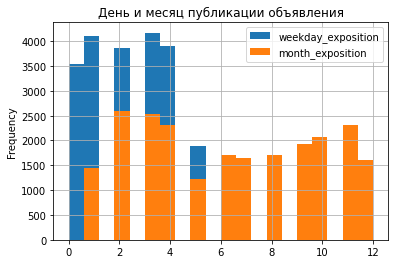

In [29]:
#data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
#data['month_exposition'] = data['first_day_exposition'].dt.month
data.plot(y = ['weekday_exposition', 'month_exposition'],  kind = 'hist', title='День и месяц публикации объявления', bins = 20, grid=True)

**Вывод:**

- Средняя площадь продаваемых квартир составляет 52 кв.м. 
- Средняя жилая площадь составляет 30 кв.м. 
- Средняя площади кухни составляет 9 кв.м.
- Средняя стоимость квартир составляет 4.6 млн руб. 
- Больше всего однокомнатных квартир (8058), на втором месте - 2-комнатные (7892), далее идут трехкомнатные (5777) и четырехкомнатные (1172).
- Высота потолков в среднем составляет 2,7 м. 
- Большинство продаваемых квартир расположены на 4-5 этажах в 9 этажных домах.
- Больше всего объявлений о продаже в радиусе 13-14 км от центра города.
- В среднем расстояние до парка у большинства квартир составляет до 500 м.
- Меньше всего новых публикаций объявлений о продаже выявлено к концу недели, в течение года публикации появлялись относительно равномерно.

count    20040.000000
mean       178.857934
std        217.541910
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

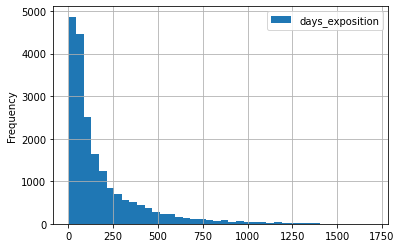

In [30]:
#Изучите, как быстро продавались квартиры
data.plot(y = 'days_exposition', kind = 'hist', bins = 40, grid = True, range = (1,1700))
data['days_exposition'].describe()

**Вывод:**
С момента публикации о продаже квартиры с бОльшей вероятностью сделка состоится в течение 95 дней. Продажи до 45 дней-необычайно быстрые, от 231 дня и более-долгие.

0.7842418171888511

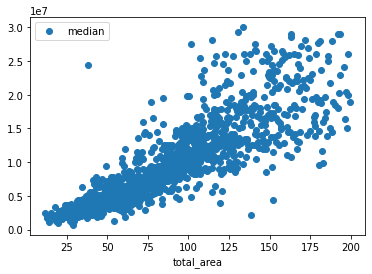

In [31]:
#цена от общей площади
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['last_price'])

0.6764801627324809

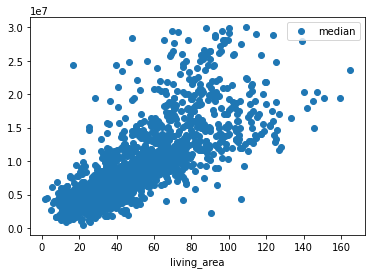

In [32]:
#цена от жилой площади
pivot_table_living_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_living_area.columns = ['mean', 'count', 'median']
pivot_table_living_area.plot(y = 'median', style = 'o')
pivot_table_living_area.sort_values('median', ascending = False)
data['living_area'].corr(data['last_price'])

0.6173288954034727

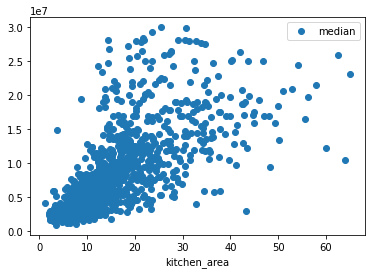

In [33]:
#цена от площади кухни
pivot_table_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_kitchen_area.columns = ['mean', 'count', 'median']
pivot_table_kitchen_area.plot(y = 'median', style = 'o')
pivot_table_kitchen_area.sort_values('median', ascending = False)
data['kitchen_area'].corr(data['last_price'])

0.4893437468522003

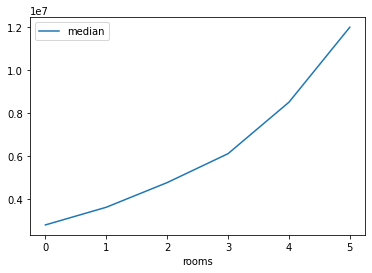

In [34]:
#цена от количества комнат

pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 60').plot(y = 'median')
pivot_table_rooms.query('count > 60').sort_values('median', ascending = False)
data['rooms'].corr(data['last_price'])

<AxesSubplot:xlabel='floor_category'>

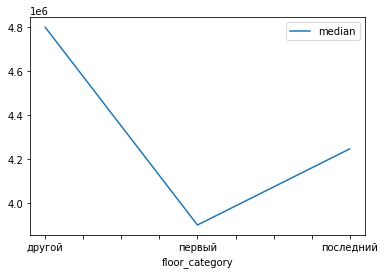

In [35]:
#цена от этажа, на котором расположена квартира
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')

,mean,count,median
weekday_exposition,,,
1,5.687331e+06,4095,4700000.0
2,5.731184e+06,3864,4650000.0
0,5.732892e+06,3536,4600000.0
3,5.768065e+06,4168,4600000.0
4,5.560826e+06,3908,4500000.0
5,5.413751e+06,1878,4500000.0
6,5.427236e+06,1646,4500000.0


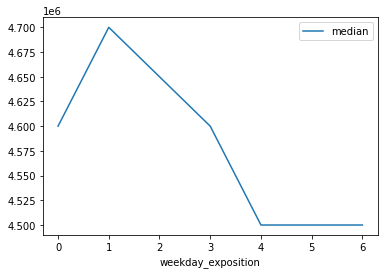

In [36]:
# цена от даты размещения (день недели)
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

,mean,count,median
month_exposition,,,
4,5.739829e+06,2319,4750000.0
9,5.805026e+06,1938,4650000.0
11,5.727048e+06,2313,4650000.0
2,5.653215e+06,2583,4600000.0
3,5.575056e+06,2524,4600000.0
7,5.680286e+06,1646,4600000.0
12,5.705331e+06,1599,4600000.0
1,5.693020e+06,1453,4550000.0
10,5.607107e+06,2074,4545000.0


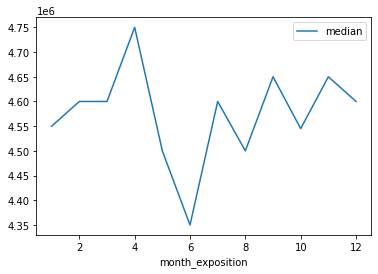

In [37]:
# цена от даты размещения (месяц)
month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_exposition.columns = ['mean', 'count', 'median']
month_exposition.plot(y = 'median')

month_exposition.sort_values('median', ascending = False)

,mean,count,median
year_exposition,,,
2014,9.515592e+06,128,7388280.0
2015,6.491941e+06,1114,5186000.0
2019,5.956481e+06,2815,5000000.0
2018,5.476938e+06,8369,4510000.0
2017,5.569409e+06,7994,4480000.0
2016,5.608907e+06,2675,4450000.0


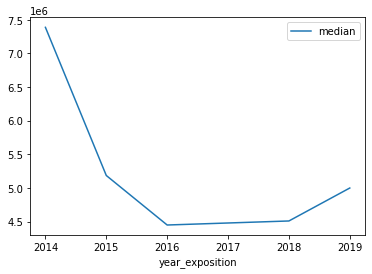

In [38]:
# цена от даты размещения (год)
year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
year_exposition.columns = ['mean', 'count', 'median']
year_exposition.plot(y = 'median')

year_exposition.sort_values('median', ascending = False)

**Вывод:**
- Цена квартиры прямо пропорциональна ее площади. 
- Цена квартиры прямо пропорциональна ее жилой площади. 
- С увеличением площади кухни цена на квартиру также увеличивается, коэффициент корреляции составил 0.51. 
- Чем больше комнат, тем выше стоимость. Однако, коэффициент корреляции здесь меньше, чем у общей площади, значит, площадь квартиры гораздо сильнее влияет на стоимость, чем количество комнат.
- Наиболее дешевый вариант квартир расположен на первом этаже. Затем- на последнем. Наиболее дорогие варианты квартир расположены в средней части зданий. 
- К концу недели стоимость квартир умньшается. Во вторник квартиры самые дорогие. Возможно, это связано с активностью пользователей, в рабочие дни они более активно выставляют недвижимость на продажу.
- наиболее высокая стоимость в апреле, низкая-в июне. В начале лета предложений и по количеству, и по стоимости меньше, возможно, это связано с отпусками. В остальное время года стоимость относительно равномерна.
- с 2014 года стоимость квартир в среднем стабильно уменьшалась. Начиная с 2017 года мы видим увеличение стоимости.    

In [39]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False)
locality_pivot_table.head(10)

,count,mean
locality_name,,
Санкт-Петербург,15209,110581.796922
поселок Мурино,552,85629.568678
поселок Шушары,439,78551.344545
Всеволожск,397,68719.320400
Пушкин,364,103122.538840
Колпино,337,75333.295801
поселок Парголово,326,90332.263023
Гатчина,307,68746.146763
деревня Кудрово,299,92473.547576


**Вывод:**
Самая высокая стоимость квадратного метра в Санкт-Петербурге, низкая - в Выборге.

,price_square_meter
count,30.000000
mean,107868.642311
std,17734.164919
min,72953.365445
25%,94954.583077
50%,105864.766791
75%,122705.329425
max,144545.676008


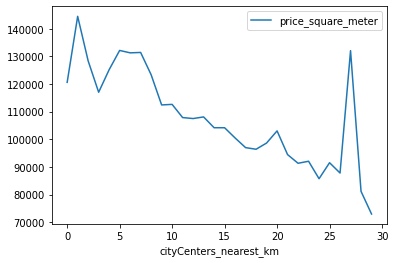

In [40]:
#средняя цена км

data['cityCenters_nearest_km'].describe() # 999999.000000 уберем
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
pivot_table_km.describe()

**Вывод**
- По графику видим, что в среднем цена на квартиру уменьшается с увеличением расстояния до центра города. Непланомерность графика может быть связана с особыми благоприятными условиями в месте продажи квартиры: элитная недвижимость, развитая инфраструктура, и т.д.

### Общий вывод

Я выполнила предобработку данных и изучила их, нашла интересные особенности и зависимости, которые существуют на рынке недвижимости.

Первым делом-изучила пропуски, изменила типы данных и заполнила пропуски там, где это возможно и логично. Например, сделала выборку потолков высотой более 5 м, в список попали такие значения, как 25 м. Логично предположить, что на самом деле это 2.5 м, подобные аномалии в таблице поправлены. 

Вторым шагом, самым интересным, провела исследовательский анализ данных. 
Получила основные характеристики средних показателей продаваемых квартир:
- Средняя площадь продаваемых квартир составляет 51 кв.м.  
- Средняя жилая площадь составляет 30 кв.м.
- Средняя площади кухни составляет 9 кв.м. 
- Средняя стоимость квартир составляет 4.6 млн руб. 
- Больше всего однокомнатных квартир (8044), на втором месте - 2-комнатные (7866), далее идут трехкомнатные (5668) и четырехкомнатные (1083).
- Высота потолков в среднем составляет 2,7 м. 
- Большинство продаваемых квартир расположены на 4-5 этажах в 9 этажных домах.
- Больше всего объявлений о продаже в радиусе 13-14 км от центра города.
- В среднем расстояние до парка у большинства квартир составляет до 500 м.

Особенности продаж в зависимости от времени:
- Меньше всего новых публикаций объявлений о продаже выявлено к концу недели. В течение года публикации появлялись относительно равномерно.
- С момента публикации о продаже квартиры с бОльшей вероятностью сделка состоится в течение 94 дней. Продажи до 45 дней-необычайно быстрые, от 228 дней и более-долгие.

Изучены факторы, которые больше всего влияют на общую (полную) стоимость объекта

- Цена квартиры прямо пропорциональна ее площади (в т.ч. жилой).
- С увеличением площади кухни цена на квартиру также увеличивается.
- Чем больше комнат, тем выше стоимость. Однако, коэффициент корреляции здесь меньше, чем у общей площади, значит, площадь квартиры гораздо сильнее влияет на стоимость, чем количество комнат.
- Наиболее дешевый вариант квартир расположен на первом этаже. Дороже - на последнем. Самые дорогие варианты квартир расположены в средней части зданий. 
- К концу недели стоимость квартир умньшается. Во вторник квартиры самые дорогие. Возможно, это связано с активностью пользователей, в рабочие дни они более активно выставляют недвижимость на продажу.
- наиболее высокая стоимость в апреле, низкая-в июне. В начале лета предложений и по количеству, и по стоимости меньше, возможно, это связано с отпусками. В остальное время года стоимость относительно равномерна.
- с 2014 года стоимость квартир в среднем стабильно уменьшалась. Начиная с 2017 года мы видим увеличение стоимости.  

В среднем цена на квартиру уменьшается с увеличением расстояния до центра города. Непланомерность графика может быть связана с особыми благоприятными условиями в месте продажи квартиры: элитная недвижимость, развитая инфраструктура, и т.д.